In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('C:/Users/srira/OneDrive/Desktop/practicals/DSBDALExam DataSets/HeartDisease/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.replace('?', np.nan, inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
for col in df.columns:
    if col != 'oldpeak' and col != 'target':
        df = df[df[col] >= 0]

In [8]:
print(f"Dataset shape after cleaning: {df.shape}")


Dataset shape after cleaning: (1025, 14)


In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Dataset shape after removing outliers: {df.shape}")

Dataset shape after removing outliers: (769, 14)


In [10]:
X = df.drop('target',axis=1)
y = df['target']

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = y.apply(lambda x: 1 if x > 0 else 0)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

In [14]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

In [15]:
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"k-Nearest Neighbors Accuracy: {acc_knn:.2f}")

Logistic Regression Accuracy: 0.87
k-Nearest Neighbors Accuracy: 0.96


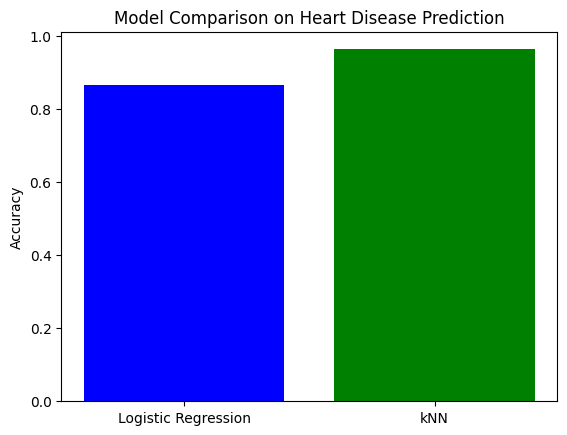

In [16]:
models = ['Logistic Regression', 'kNN']
accuracies = [acc_lr, acc_knn]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Comparison on Heart Disease Prediction')
plt.show()